In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv(r'C:\Users\admin\Downloads\Loan_Train.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
df['Gender'] = df['Gender'].fillna('unknown')

In [9]:
df['Gender'].value_counts()

Male       489
Female     112
unknown     13
Name: Gender, dtype: int64

In [10]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [11]:
df['Married'] = df['Married'].fillna('unknown')

In [12]:
df['Married'].value_counts()

Yes        398
No         213
unknown      3
Name: Married, dtype: int64

In [13]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [53]:
df['Dependents']

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: category
Categories (4, object): [3, '0', '1', '2']

In [14]:
df['Dependents'] = df['Dependents'].fillna('0')


In [15]:
df['Dependents'] = df['Dependents'].replace({'3+':3})

In [16]:
df['Dependents'] = df['Dependents'].replace({'3+':3})

In [17]:
df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [18]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [19]:
df['Self_Employed'] = df['Self_Employed'].fillna('unknown')

In [20]:
df['Self_Employed'].value_counts()

No         500
Yes         82
unknown     32
Name: Self_Employed, dtype: int64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

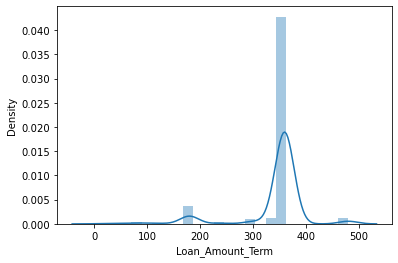

In [63]:
sns.distplot(df['Loan_Amount_Term'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1d96ddbff40>,
 'caps': [<matplotlib.lines.Line2D at 0x1d96ddcc640>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d96ddbfbe0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d96ddccd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d96ddd90a0>],
 'means': []}

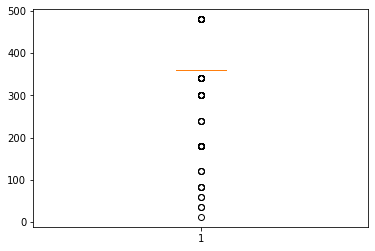

In [59]:
plt.boxplot(df['Loan_Amount_Term'])

In [21]:
np.mean(df['Loan_Amount_Term'])

342.0

In [55]:
df['Loan_Amount_Term'].mean()

342.0

In [22]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(342.0)

In [23]:
df['Loan_Amount_Term'].isnull().sum()

0

In [24]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [25]:
df['Credit_History'] = df['Credit_History'].fillna(1.0)

In [26]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

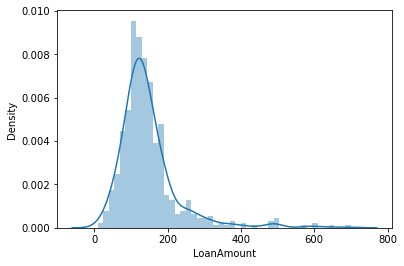

In [61]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:>

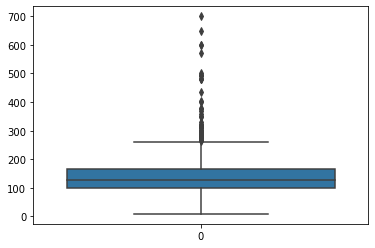

In [66]:
sns.boxplot(data = df['LoanAmount'])

In [27]:
np.mean(df['LoanAmount'])

146.41216216216216

In [67]:
np.median(df['LoanAmount'])

129.0

In [28]:
df['LoanAmount'] = df['LoanAmount'].fillna(146.4)

In [29]:
df['LoanAmount'].isnull().sum()

0

In [30]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [31]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [68]:
df.dtypes

Loan_ID                object
Gender                  int64
Married                 int64
Dependents           category
Education               int64
Self_Employed           int64
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History       category
Property_Area           int64
Loan_Status             int64
dtype: object

In [32]:
mylist_train = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area' , 'Loan_Status']

In [33]:
for i in mylist_train:
    df[i] = df[i].astype({i:'category'})

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    object  
 1   Gender             614 non-null    category
 2   Married            614 non-null    category
 3   Dependents         614 non-null    category
 4   Education          614 non-null    category
 5   Self_Employed      614 non-null    category
 6   ApplicantIncome    614 non-null    int64   
 7   CoapplicantIncome  614 non-null    float64 
 8   LoanAmount         614 non-null    float64 
 9   Loan_Amount_Term   614 non-null    float64 
 10  Credit_History     614 non-null    category
 11  Property_Area      614 non-null    category
 12  Loan_Status        614 non-null    category
dtypes: category(8), float64(3), int64(1), object(1)
memory usage: 30.0+ KB


In [35]:
df['Loan_Status'].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


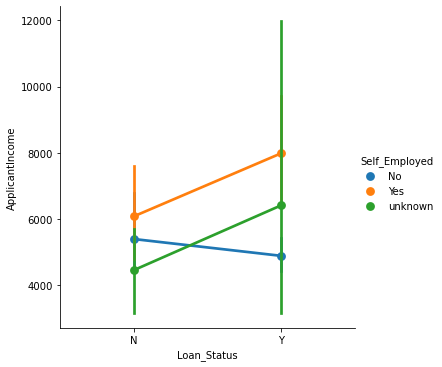

In [36]:
sns.factorplot('Loan_Status','ApplicantIncome', data=df, hue='Self_Employed')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


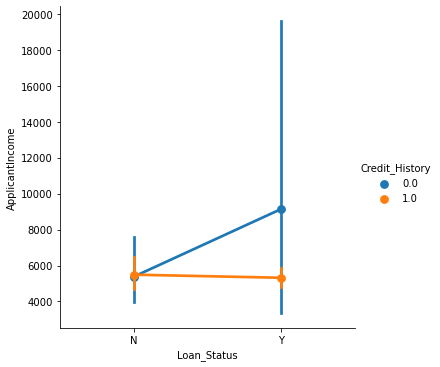

In [37]:
sns.factorplot('Loan_Status','ApplicantIncome', data=df,hue='Credit_History')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


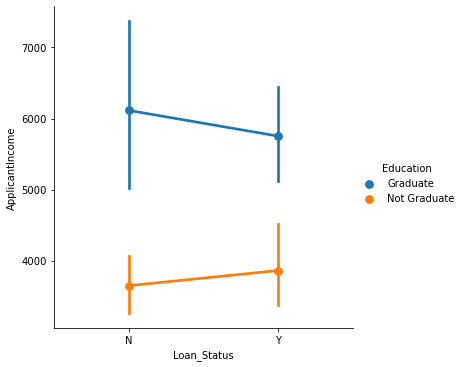

In [38]:
sns.factorplot('Loan_Status','ApplicantIncome', data=df,hue='Education')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


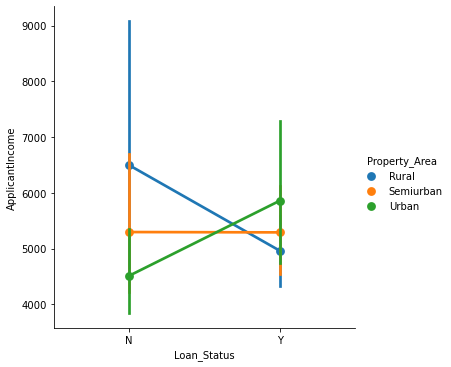

In [39]:
sns.factorplot('Loan_Status','ApplicantIncome', data=df, hue='Property_Area')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


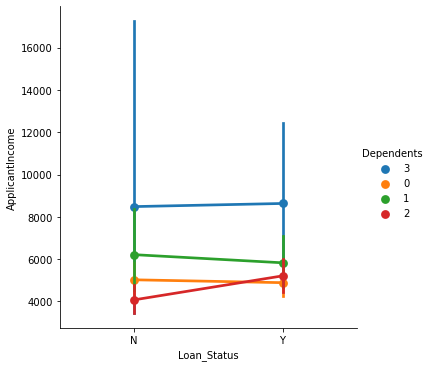

In [40]:
sns.factorplot('Loan_Status','ApplicantIncome', data=df, hue='Dependents')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


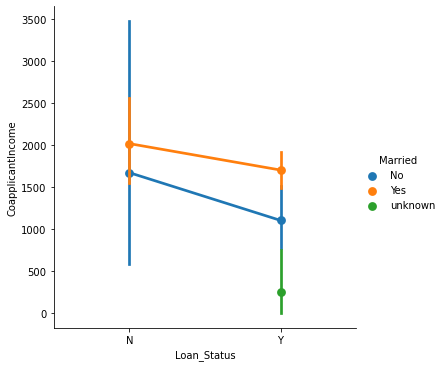

In [41]:
sns.factorplot('Loan_Status','CoapplicantIncome', data=df, hue='Married')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


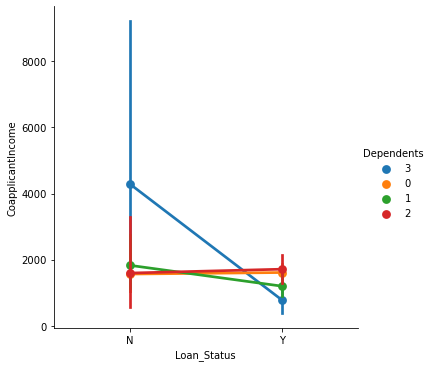

In [42]:
sns.factorplot('Loan_Status','CoapplicantIncome', data=df, hue='Dependents')

In [43]:
df['Gender'] = df['Gender'].replace({'Male':0, 'Female':1,'unknown' : 2})

In [44]:
df['Married'] = df['Married'].replace({'Yes' :1, 'No': 0, 'unknown':2})

In [45]:
df['Education'] = df['Education'].replace ({'Graduate' : 1, 'Not Graduate' : 0})

In [46]:
df['Self_Employed'] = df['Self_Employed'].replace ({'Yes': 1,'No' : 0, 'unknown':2})

In [47]:
df['Property_Area'] = df['Property_Area'].replace ({'Semiurban': 1,'Urban' : 0, 'Rural':2})

In [48]:
df['Loan_Status'] = df['Loan_Status'].replace({'Y':1, 'N':0})

In [49]:
X_train = df.drop(columns=['Loan_Status'])

In [50]:
y_train = df['Loan_Status']

In [51]:
lr = LogisticRegression()

In [52]:
lr.fit(X_train,y_train)

ValueError: could not convert string to float: 'LP001002'

In [ ]:
lr.score(X_train,y_train)

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
knn.score(X_train,y_train)